In [1]:
from Dissects.skel import Skel
from Dissects.utils import clean_skeleton

import os
from skimage import io
import numpy as np
import pandas as pd
import copy
import sys
import matplotlib.pyplot as plt
sys.setrecursionlimit(10000)




In [2]:
# directory='/home/admin-suz/Documents/testCellSeg/TestSPIM/'
# # import image
# skeleton = Skel(os.path.join(directory,'C1-20191112_SQHrfp-EcadGFP_DLG647_180degre_04-1.fits_c100.up.NDskl.a.NDskl'))

directory='/home/admin-suz/Documents/testCellSeg/Test1/'
skeleton = Skel(os.path.join(directory,'im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl'))

if skeleton.isValid():
    skeleton.write_vtp(os.path.join(directory, "image_original.vtp"))
else:
    raise nameError('skeleton not valid')   
    
# lecture de l'image tif, pour récupérer le ratio depth/xy pixel

reading: 3763 critical points
reading: 3648 filaments
reading: critical points data
critical points done
reading: filaments data
Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/image_original.vtp 



In [3]:
clean_skeleton(skeleton)

Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl/_removefil.vtp 



In [4]:
data_crit = []

for c in skeleton.crit:
    data_crit.append(
        {
            "id":c,
            "x": c.pos[0],
            "y": c.pos[1],
            "z": c.pos[2] * 0.22/0.18,
            "n_fil": c.nfil,
            "val": int(c.val),
            "pair": c.pair,
            "type":int(c.typ),
            "destCritId_addr":c.destCritId,
            "filId":c.filId,
        }
    )

data_crit = pd.DataFrame.from_records(data_crit)
tmp_id = []
for ci in data_crit['destCritId_addr'].values:
    tmp=[]
    for c in ci:
        tmp.append(data_crit[data_crit['id']==c].index.to_numpy()[0])
        
    tmp_id.append(tmp)

data_crit['destCritId'] = tmp_id
data_crit.head()

id      x      y     z  \
0  <Dissects.skel.CriticalPoint object at 0x7fe04...  312.0   46.0  11.0   
1  <Dissects.skel.CriticalPoint object at 0x7fe04...  307.0   47.0  11.0   
2  <Dissects.skel.CriticalPoint object at 0x7fe04...  336.0   49.0  11.0   
3  <Dissects.skel.CriticalPoint object at 0x7fe04...  261.0  140.0  11.0   
4  <Dissects.skel.CriticalPoint object at 0x7fe04...  259.0  142.0  11.0   

   n_fil    val                                               pair  type  \
0      2   4184  <Dissects.skel.CriticalPoint object at 0x7fe04...     3   
1      2   3441  <Dissects.skel.CriticalPoint object at 0x7fe04...     3   
2      2  10609  <Dissects.skel.CriticalPoint object at 0x7fe04...     3   
3      3  10965  <Dissects.skel.CriticalPoint object at 0x7fe04...     3   
4      2   9023  <Dissects.skel.CriticalPoint object at 0x7fe04...     3   

                                     destCritId_addr  \
0  [<Dissects.skel.CriticalPoint object at 0x7fe0...   
1  [<Dissects.skel.CriticalPoint object at 0x7fe0...   
2  [<Dissects.skel.CriticalPoint object at 0x7fe0...   
3  [<Dissects.skel.CriticalPoint object at 0x7fe0...   
4  [<Dissects.skel.CriticalPoint object at 0x7fe0...   

                                               filId       destCritId  
0  [<Dissects.skel.Filament object at 0x7fe0437f6...       [906, 922]  
1  [<Dissects.skel.Filament object at 0x7fe0437f6...       [907, 922]  
2  [<Dissects.skel.Filament object at 0x7fe0437f6...       [908, 909]  
3  [<Dissects.skel.Filament object at 0x7fe0437f6...  [914, 915, 949]  
4  [<Dissects.skel.Filament object at 0x7fe0437f6...       [915, 950]

In [5]:
data_fil = []

for f in skeleton.fil:
    data_fil.append(
        {
            "id":f,
            "cp1_add": f.cp1,
            "cp2_add": f.cp2,
            "cp1": data_crit[data_crit['id']==f.cp1].index.to_numpy()[0],
            "cp2": data_crit[data_crit['id']==f.cp2].index.to_numpy()[0],
            "points": f.points
            
        }
    )

data_fil = pd.DataFrame.from_records(data_fil)
data_fil.head()

id  \
0  <Dissects.skel.Filament object at 0x7fe0437f6750>   
1  <Dissects.skel.Filament object at 0x7fe0437f6550>   
2  <Dissects.skel.Filament object at 0x7fe0437f66d0>   
3  <Dissects.skel.Filament object at 0x7fe0437f6790>   
4  <Dissects.skel.Filament object at 0x7fe0437f6850>   

                                             cp1_add  \
0  <Dissects.skel.CriticalPoint object at 0x7fe04...   
1  <Dissects.skel.CriticalPoint object at 0x7fe04...   
2  <Dissects.skel.CriticalPoint object at 0x7fe04...   
3  <Dissects.skel.CriticalPoint object at 0x7fe04...   
4  <Dissects.skel.CriticalPoint object at 0x7fe04...   

                                             cp2_add  cp1  cp2  \
0  <Dissects.skel.CriticalPoint object at 0x7fe04...  905    5   
1  <Dissects.skel.CriticalPoint object at 0x7fe04...  905    6   
2  <Dissects.skel.CriticalPoint object at 0x7fe04...  906   11   
3  <Dissects.skel.CriticalPoint object at 0x7fe04...  906    0   
4  <Dissects.skel.CriticalPoint object at 0x7fe04...  907    1   

                                              points  
0  [[254.0, 152.5, 8.0], [254.0, 151.5, 8.0], [25...  
1  [[254.0, 152.5, 8.0], [254.0, 153.5, 8.5], [25...  
2  [[315.5, 47.0, 9.0], [316.5, 47.0, 9.0], [317....  
3  [[315.5, 47.0, 9.0], [314.5, 46.5, 9.0], [313....  
4  [[301.5, 49.0, 9.0], [302.5, 49.0, 9.0], [303....

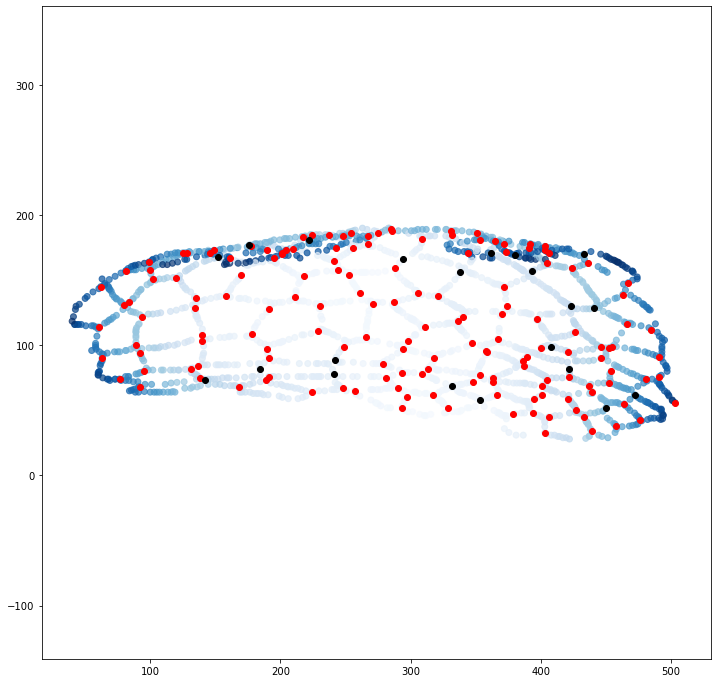

In [6]:
fig, ax = plt.subplots()

ax.scatter(data_crit.x, data_crit.y, c=data_crit.z, cmap='Blues', alpha=0.7)

#ax.scatter(data_crit.loc[[0,3]]['x'], data_crit.loc[[0,3]]['y'], color='red')

data_crit_2 = data_crit[data_crit.n_fil==3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'red')

data_crit_2 = data_crit[data_crit.n_fil>3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'black')

ax.axis('equal')

# ax.set_xlim(300, 400)
# ax.set_ylim(50, 100)
fig.set_size_inches(12, 12)


In [7]:
import ipyvolume as ipv
from matplotlib import cm
data=data_crit.copy()
cmap = cm.get_cmap("viridis")
colors = cmap((data.z-data.z.min())/(data.z.max()-data.z.min()))

ipv.clear()
ipv.scatter(x=np.array(data.x)*10, y=np.array(data.y)*10, z=data.z*10, size=1, color=colors, marker='circle_2d')
ipv.squarelim()
ipv.show()

In [17]:
from itertools import chain

x=[]
y=[]
z=[]
for fp in data_fil.points:
    x.append(list(fp.flatten()[0::3]))
    y.append(list(fp.flatten()[1::3]))
    z.append(list(fp.flatten()[2::3]))
x = list(chain.from_iterable(x))
y = list(chain.from_iterable(y))
z = list(chain.from_iterable(z))

x = list(map(int, x))
y = list(map(int, y))
z = list(map(int, z))


import plotly.graph_objects as go

data1 = go.Scatter3d(x=data_crit.x,
                      y=data_crit.y,
                      z=data_crit.z,
                      mode='markers',
                     marker=dict(
                        size=1,
                        color='black',                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

data0 = go.Scatter3d(x=x,
                      y=y,
                      z=z,
                      mode='markers',
                     marker=dict(
                        size=1,
                        color=z,                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

data_crit_2 = data_crit[data_crit.n_fil>2]

data2 = go.Scatter3d(x=data_crit_2['x'].astype(int),
                      y=data_crit_2['y'].astype(int),
                      z=data_crit_2['z'].astype(int),
                      mode='markers',
                     marker=dict(
                        size=2,
                        color='red',                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

fig = go.Figure(data=[data0],)#, data1, data2])

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90),
                 )
fig['layout'].update(scene=dict(aspectmode="data"))

fig.show()

In [18]:
img0 = io.imread(os.path.join(directory, "image.tif"))
img_output = img0.copy()
img_output = np.where(img_output>0, 0, img_output) 
w = 0
for f in skeleton.fil:
    for p in f.points: 
        if w != 0:
            for z_ in range(int(p[2])-w,int(p[2])+w):
                for y_ in range(int(p[1])-w,int(p[1])+w):
                    for x_ in range(int(p[0])-w,int(p[0])+w):
                        try:
                            img_output[z_][y_][x_]=1
                        except:
                            pass
        else : 
            x_=int(p[0])
            y_=int(p[1])
            z_=int(p[2])
            img_output[z_][y_][x_]=1
#io.imsave('binary_images.tif', img_output)

In [147]:
from sklearn import manifold
from skimage import morphology
from skimage import filters
from scipy import ndimage as ndi


def flatten_tissu (training_data, datas, n_neighbors=50, n_components=2, path_method='auto', n_jobs=1):
    
    embedding = manifold.Isomap(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                path_method=path_method,
                                n_jobs=n_jobs)
    
    # faire l'apprentissage sur les points critiques
    embedding.fit(training_data)

    # Appliquer sur un plus grand jeux de points
    point_ = embedding.transform(datas).T
    
    return point_
    
    

def create_binary(point_transformed):
    """ Création d'une image binaire
    """
    
    # Arrondi à la centaine supérieure
    nrows = int(max(abs(min(point_transformed[0])), max(point_transformed[0]))*2//100+1)*100
    ncols = int(max(abs(min(point_transformed[1])), max(point_transformed[1]))*2//100+1)*100
    img_binary = np.zeros([ncols,nrows],dtype=np.uint8)
    points = np.array([point_transformed[0], point_transformed[1]])
    for i in range (point_transformed.shape[1]):
        img_binary[round(points[1][i]+(ncols/2)).astype(int),
                   round(points[0][i]+(nrows/2)).astype(int)] = 1

    # voir ce qui peut etre améliorer pour fermer les cellules
    img_binary = morphology.binary_dilation(img_binary)
    img_binary = morphology.binary_dilation(img_binary)
    img_binary = morphology.skeletonize(img_binary)
    
    return img_binary




def segmentation(InvMaskFil, min_area = 2):
    edges = filters.sobel(InvMaskFil)
    markers = np.zeros_like(InvMaskFil)
    markers[InvMaskFil == 0] = 1
    markers[InvMaskFil > 0] = 2

    segmentation = morphology.watershed(edges, markers)
    segmentation, _ = ndi.label(segmentation == 2) 
    segmentation = morphology.remove_small_objects(segmentation, min_area)

    return segmentation

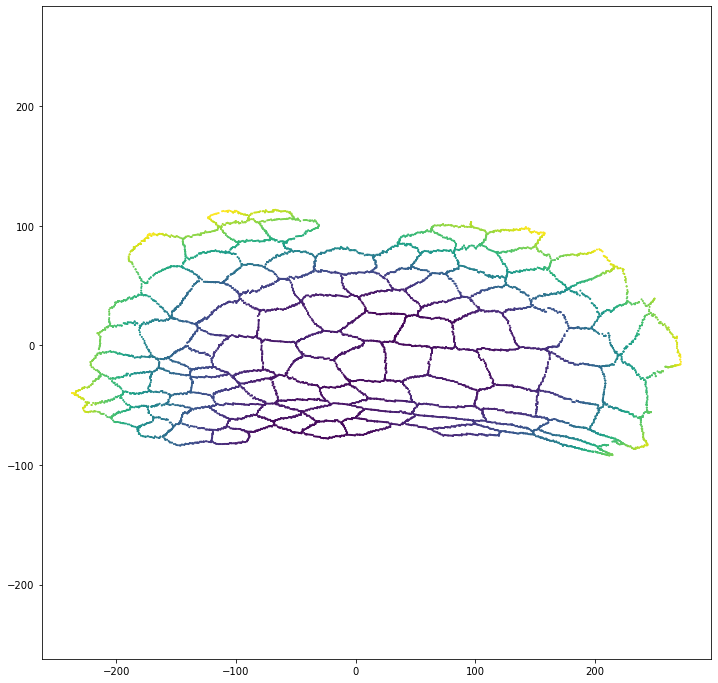

In [141]:
# Create a isomap

training_data = np.array([data_crit['x'],data_crit['y'],data_crit['z']]).T
datas = np.array([x,y,z]).T
point_transformed = flatten_tissu (training_data, datas)

fig, ax = plt.subplots()
ax.scatter(point_transformed[0], point_transformed[1], c=z, cmap=plt.cm.viridis, s=1)
ax.axis('equal')
fig.set_size_inches(12, 12)

In [148]:
# Creation d'une image binaire
img_binary = create_binary(point_transformed)

import plotly.express as px
fig = px.imshow(img_binary)
fig.show()

In [149]:
img_binary_reverse = (img_binary.astype(int)-1)*-1
img_segmentation = segmentation(img_binary_reverse)

fig = px.imshow(img_segmentation)
fig.show()

In [163]:
x_border, y_border = np.where(img_segmentation==0)

In [180]:
i_ = 525
print(x_border[i_], y_border[i_])
img_segmentation[x_border[i_]-1: x_border[i_]+2,y_border[i_]-1: y_border[i_]+2]

79 453


array([[18, 18,  0],
       [ 0,  0,  0],
       [24, 24,  0]], dtype=int32)

In [954]:
def lines_intersection(a, v, b, u): 
    """
    a, b = 1 point 
    v, u = vecteur directeur
    """
    left = np.array([[a['x'], -b['x']],
                    [a['y'], -b['y']],
                    ])

    right = np.array([v['x']-u['x'],
                      v['y']-u['y'],
                     ])
    t, tt = np.linalg.solve(left, right)
    
    x_ = v['x']*t + a['x']
    y_ = v['y']*t + a['y']
    z_ = v['z']*t + a['z']
    
    
    return x_, y_, z_


def multiple_intersection(point, vector):
    x_intersect = []
    y_intersect = []
    z_intersect = []
    for i in range(len(point)-1):
        for j in range(i+1, len(point)):
            a = {'x':point[i][0],
                 'y':point[i][1],
                 'z':point[i][2]}
            v = {'x':vector[i][0],
                 'y':vector[i][1],
                 'z':vector[i][2]}

            b = {'x':point[j][0],
                 'y':point[j][1],
                 'z':point[j][2]}
            u = {'x':vector[j][0],
                 'y':vector[j][1],
                 'z':vector[j][2]}

            x_tmp, y_tmp, z_tmp = lines_intersection(a, v, b, u)
            x_intersect.append(x_tmp)
            y_intersect.append(y_tmp)
            z_intersect.append(z_tmp)
    return np.mean(x_intersect), np.mean(y_intersect), np.mean(z_intersect)

In [861]:
# Liste des points critiques qui ont 3 filaments ou plus 
df_cp_3 = data_crit[data_crit.n_fil>2]
df_cp_3.reset_index(inplace=True)


In [959]:
data_intersect = pd.DataFrame(columns=['x', 'y', 'z'])

for cp_pos in pos_cp_3.index:

    cp_z, cp_y, cp_x = pos_cp_3.loc[cp_pos][['z', 'y', 'x']]

    data_search = []

    w = 10
    for z_ in range(int(cp_z)-w,int(cp_z)+w):
        for y_ in range(int(cp_y)-w,int(cp_y)+w):
            for x_ in range(int(cp_x)-w,int(cp_x)+w):
                if z_ >= img_output.shape[0]:
                    z_ = img_output.shape[0]-1
                if img_output[z_][y_][x_]==1:
                    data_search.append([x_, y_, z_])
    data_search=np.array(data_search)


    # Align point on a plane 
    # To a easiest calculation of line intersection
    u_, s_, rotation = np.linalg.svd(data_search)
    data_search_rot = np.dot(data_search, rotation.T)


    # Create temporary file with data
    # Pour pouvoir utiliser le code c++ de la transformée de Hough
    file = open('data_tmp.dat', 'w')
    for points in data_search_rot:
        sentance = points[2], points[1], points[0]
        # Le [1:-1] permet de retirer les parentheses...
        file.write(str(sentance)[1:-1] + '\n')
    file.close()

    # Appel en bash de la transformée de Hough
    # résultat de la transformée dans output_tmp_1.txt
    !./hough3d-code/hough3dlines -dx 2 data_tmp.dat > output_tmp_1.txt


    # Récupération du résultat de la transformée de Hough
    point_origin = []
    point_direction = []

    file = open("output_tmp_1.txt", 'r')
    for line in file.readlines():
        zs, ys, xs = line.split('(')[1].split(')')[0].split(',')
        point_origin.append([float(xs), float(ys), float(zs)])

        zs, ys, xs = line.split('(')[2].split(')')[0].split(',')
        point_direction.append([float(xs), float(ys), float(zs)])

    file.close()

    # Si deux droites de trouver, une seule intersection à calculer...
    if len(point_origin)==2:
        a = {'x':point_origin[0][0],
            'y':point_origin[0][1],
            'z':point_origin[0][2]}
        v = {'x':point_direction[0][0],
            'y':point_direction[0][1],
            'z':point_direction[0][2]}

        b = {'x':point_origin[1][0],
            'y':point_origin[1][1],
            'z':point_origin[1][2]}
        u = {'x':point_direction[1][0],
            'y':point_direction[1][1],
            'z':point_direction[1][2]}

        x_intersect, y_intersect, z_intersect = lines_intersection(a, v, b, u)
        # reorientation of point 
        x_intersect, y_intersect, z_intersect = np.dot([x_intersect, y_intersect, z_intersect], rotation)
        data_intersect = data_intersect.append({'x':x_intersect, 'y':y_intersect, 'z':z_intersect}, 
                              ignore_index=True)

    elif len(point_origin)>=3:
        x_intersect, y_intersect, z_intersect = multiple_intersection(point_origin, point_direction)
        x_intersect, y_intersect, z_intersect = np.dot([x_intersect, y_intersect, z_intersect], rotation)
        data_intersect = data_intersect.append({'x':x_intersect, 'y':y_intersect, 'z':z_intersect}, 
                              ignore_index=True)
    else:
        print(len(point_origin))

1
1
1
1
1
1
1
Error: point cloud has less than two points
0
1
1
Error: dx too large
0
Error: all points in point cloud identical
0


In [961]:
trace1=go.Scatter3d(x=x,
                  y=y,
                  z=z,
                  mode='markers',
                 marker=dict(
                    size=1,
                    color='black',                # set color to an array/list of desired values
                    colorscale='Viridis',   # choose a colorscale
                    opacity=0.8
                 )
)

trace3=go.Scatter3d(x=data_intersect.x,
                  y=data_intersect.y,
                  z=data_intersect.z,
                  mode='markers',
                 marker=dict(
                    size=2,
                    color='red',                # set color to an array/list of desired values
                    opacity=0.8
                 )
)


data=[trace1, trace3, ]

fig = go.Figure(data=data)

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))
fig.show()

In [814]:
trace1=go.Scatter3d(x=data_search[:,0],
                  y=data_search[:,1],
                  z=data_search[:,2],
                  mode='markers',
                 marker=dict(
                    size=1,
                    color='black',                # set color to an array/list of desired values
                    colorscale='Viridis',   # choose a colorscale
                    opacity=0.8
                 )
)

trace2=go.Scatter3d(x=[int(cp_x)],
                  y=[int(cp_y)],
                  z=[int(cp_z)],
                  mode='markers',
                 marker=dict(
                    size=2,
                    color='red',                # set color to an array/list of desired values
                    opacity=0.5
                 )
)


trace3=go.Scatter3d(x=[x_intersect],
                  y=[y_intersect],
                  z=[z_intersect],
                  mode='markers',
                 marker=dict(
                    size=5,
                    color='green',                # set color to an array/list of desired values
                    opacity=0.5
                 )
)
data=[trace2, trace1, trace3]

fig = go.Figure(data=data)
# Create scatter trace of text labels
# for id_ in range(len(point_direction)):
#     fig.add_trace(go.Scatter3d(
#                     x=[point_origin[id_][2], point_origin[id_][2]+point_direction[id_][2]*10],
#                       y=[point_origin[id_][1], point_origin[id_][1]+point_direction[id_][1]*10],
#                       z=[point_origin[id_][0], point_origin[id_][0]+point_direction[id_][0]*10],
#                       mode='lines',
#                      line=dict(
#                         width=5,
#                         color='blue',                # set color to an array/list of desired values
                        
#                      )))


fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))
fig.show()

In [501]:
def activated_pixel(images, center_pos, width=1):
    """
    Cherche les pixels appartenant au masque autour d'un pixel 'center_pos', 
    à une distance d'un pixel
    return toutes les positions des pixel faisant partie du masque
    """
    
    list_activated_pixel={'x':[], 
                        'y':[],
                        'z':[]}
    
    for x in range (center_pos['x']-width, center_pos['x']+width+1):
        for y in range (center_pos['y']-width, center_pos['y']+width+1):
            for z in range (center_pos['z']-width, center_pos['z']+width+1):
                if images[z][y][x]==65000 :
                    if not((x==center_pos['x']) and (y==center_pos['y']) and (z==center_pos['z'])):
                        list_activated_pixel['x'].append(x)
                        list_activated_pixel['y'].append(y)
                        list_activated_pixel['z'].append(z)

    return list_activated_pixel



def length(v):
    return np.sqrt(np.dot(v,v))

def angle_calculation(v1, v2):
    theta = np.arccos(round(np.dot(v1, v2) / (length(v1) * length(v2)),4))*180/np.pi+180 
    x = v2[0]-v1[0]
    y = v2[1]-v1[1]
    z = v2[2]-v1[2]
    phi = np.arctan2(y/(length([x,y,z])*np.sin(theta)), x/(length([x,y,z])*np.sin(theta)))*180/np.pi+180
    return theta

    

In [ ]:
#TTRIANGULATION DE DELAUNAY

In [207]:
from scipy.spatial import Delaunay, Voronoi
pos = []
for i in range(len(x)):
    pos.append([x[i], y[i], z[i]])
pos  = np.array(pos)
tri = Delaunay(pos)

In [208]:
tri.simplices

array([[10952, 10777, 11048, 10573],
       [10779, 10777, 11048, 10573],
       [10780, 10779, 10777, 11048],
       ...,
       [ 2621,  2638,  2625,  2132],
       [ 2621,  2635,  2619,  2132],
       [ 2621,  2618,  2619,  2132]], dtype=int32)

In [209]:
import plotly as py
import plotly.figure_factory as FF

trace1=go.Scatter3d(x=x,
                  y=y,
                  z=z,
                  mode='markers',
                 marker=dict(
                    size=1,
                    color='black',                # set color to an array/list of desired values
                    colorscale='Viridis',   # choose a colorscale
                    opacity=0.8
                 )
)
fig1 =FF.create_trisurf(x=pos[:,0], y=pos[:,1], z=pos[:,2],
                         simplices=tri.convex_hull, showbackground=True,
                       colormap="Reds",)
                         #title="", aspectratio=dict(x=1, y=1, z=0.3))

    
fig1['data'][0].update(opacity=0.9)
fig1['data'][1].update(line=dict(color='red',
                                width=2))
data=[fig1.data[0], fig1.data[1], trace1]


fig = go.Figure(data=data)

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))
fig.show()

    
    
# fig1.update_layout(title='Filament', autosize=False,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig1['layout'].update(scene=dict(aspectmode="data"))
# fig1.show()

In [300]:
def subdivide(verts, faces):
    """Subdivide each triangle into four triangles, pushing verts to the unit sphere"""
    triangles = len(faces)
    for faceIndex in range(triangles):
    
        # Create three new verts at the midpoints of each edge:
        face = faces[faceIndex]
        a = face[0]
        b = face[1]
        c = face[2]
            
        verts.append((a + b)[:])
        verts.append((b + c)[:])
        verts.append((a + c)[:])

        # Split the current triangle into four smaller triangles:
        i = len(verts) - 3
        j, k = i+1, i+2
        faces.append((i, j, k))
        faces.append((face[0], i, k))
        faces.append((i, face[1], j))
        faces[faceIndex] = (k, j, face[2])

    return verts, faces

In [301]:
subdivide(pos.tolist(), tri.convex_hull)

IndexError: invalid index to scalar variable.

In [306]:
import numpy as np

#unit normal vector of plane defined by points a, b, and c
def unit_normal(a, b, c):
    x = np.linalg.det([[1,a[1],a[2]],
         [1,b[1],b[2]],
         [1,c[1],c[2]]])
    y = np.linalg.det([[a[0],1,a[2]],
         [b[0],1,b[2]],
         [c[0],1,c[2]]])
    z = np.linalg.det([[a[0],a[1],1],
         [b[0],b[1],1],
         [c[0],c[1],1]])
    magnitude = (x**2 + y**2 + z**2)**.5
    return (x/magnitude, y/magnitude, z/magnitude)

#area of polygon poly
def poly_area(poly):
    if len(poly) < 3: # not a plane - no area
        return 0
    total = [0, 0, 0]
    N = len(poly)
    for i in range(N):
        vi1 = poly[i]
        vi2 = poly[(i+1) % N]
        prod = np.cross(vi1, vi2)
        total[0] += prod[0]
        total[1] += prod[1]
        total[2] += prod[2]
    result = np.dot(total, unit_normal(poly[0], poly[1], poly[2]))
    return abs(result/2)

In [307]:
poly = [[0, 0, 0], [10, 0, 0], [10, 3, 4], [0, 3, 4]]
poly_translated = [[0+5, 0+5, 0+5], [10+5, 0+5, 0+5], [10+5, 3+5, 4+5], [0+5, 3+5, 4+5]]
print(area(poly))
print(area(poly_translated))
print(area([[0,0,0],[1,1,1]]))


50.0
50.0
0
